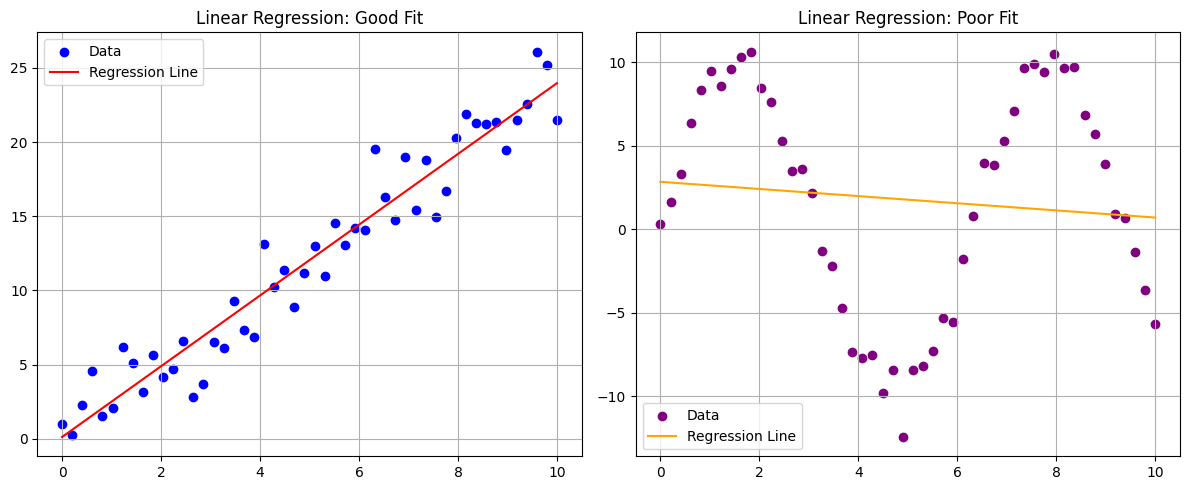

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# 시드 고정
np.random.seed(42)

# ① 선형회귀가 잘 작동하는 사례 (정비례 관계)
X_good = np.linspace(0, 10, 50).reshape(-1, 1)
y_good = 2.5 * X_good.flatten() + np.random.normal(scale=2, size=50)

# ② 선형회귀가 잘 작동하지 않는 사례 (곡선 관계)
X_bad = np.linspace(0, 10, 50).reshape(-1, 1)
y_bad = np.sin(X_bad).flatten() * 10 + np.random.normal(scale=1, size=50)

# 모델 학습
model_good = LinearRegression().fit(X_good, y_good)
model_bad = LinearRegression().fit(X_bad, y_bad)

# 예측값
y_pred_good = model_good.predict(X_good)
y_pred_bad = model_bad.predict(X_bad)

# 그래프 출력
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# 왼쪽: 선형관계 - 잘 맞는 경우
axes[0].scatter(X_good, y_good, color='blue', label='Data')
axes[0].plot(X_good, y_pred_good, color='red', label='Regression Line')
axes[0].set_title('Linear Regression: Good Fit')
axes[0].legend()
axes[0].grid(True)

# 오른쪽: 비선형관계 - 잘 안 맞는 경우
axes[1].scatter(X_bad, y_bad, color='purple', label='Data')
axes[1].plot(X_bad, y_pred_bad, color='orange', label='Regression Line')
axes[1].set_title('Linear Regression: Poor Fit')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()

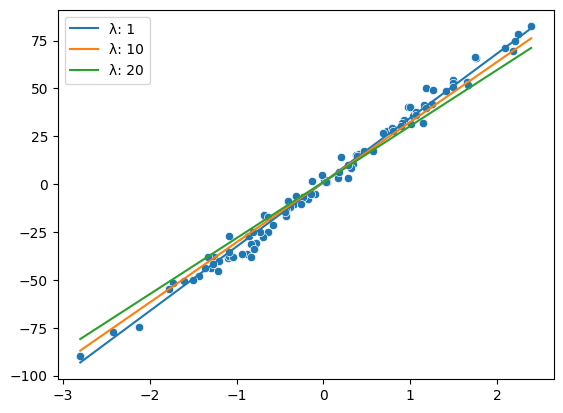

In [8]:
from sklearn.linear_model import Ridge

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_regression

# 예제로 사용할 데이터셋을 만듭니다.
X, y = make_regression(
    n_samples=100, 
    n_features=1,  # 입력 변수는 한 개로 합니다,
    n_informative=1, 
    noise=4.0,
    bias=1.0, 
    random_state=123
)

def linear_reg(X_1, beta_hat):
    """
    학습을 통해 도출한 beta_hat으로 y값 예측합니다.
    """
    return np.dot(X_1, beta_hat)

def plot_linear_model(x_min, x_max, beta_hat, **kwarg):
    """
    beta_hat의 회귀선을 출력합니다.
    """
    x_range = np.array([
        [x_min, 1], 
        [x_max, 1]
    ])
    sns.lineplot(x=x_range[:, 0], y=linear_reg(x_range, beta_hat), **kwarg)


sns.scatterplot(x = X[:, 0], y = y)
# 규제의 강도(1, 10, 20)에 따른 선형 회귀선을 출력합니다.
losses = list()
for alpha in [1, 10, 20]:
    reg_rd = Ridge(alpha=alpha)
    reg_rd.fit(X, y)
    plot_linear_model(X[:, 0].min(), X[:, 0].max(), np.array([reg_rd.coef_[0], reg_rd.intercept_]), label='λ: {}'.format(alpha))
    y_hat = reg_rd.predict(X)
    losses.append(np.mean(np.square(y - y_hat)))
#plot_linear_model(X[:, 0].min(), X[:, 0].max(), beta_hat, color='red')
plt.show()

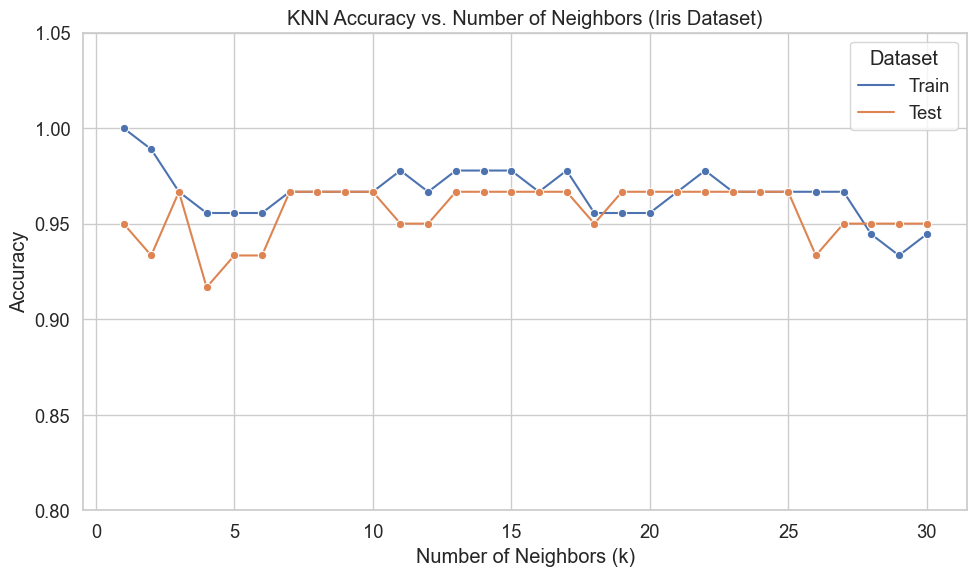

In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# 1. Load iris dataset (no noise)
X, y = load_iris(return_X_y=True)

# 2. Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42, stratify = y)

# 3. Evaluate performance across different k values
results = []

for k in range(1, 31):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)

    train_acc = accuracy_score(y_train, model.predict(X_train))
    test_acc = accuracy_score(y_test, model.predict(X_test))

    results.append({"k": k, "Accuracy": train_acc, "Set": "Train"})
    results.append({"k": k, "Accuracy": test_acc, "Set": "Test"})

# 4. Convert to DataFrame for seaborn
df_results = pd.DataFrame(results)

# 5. Plot with seaborn
sns.set(style="whitegrid", font_scale=1.2)
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_results, x="k", y="Accuracy", hue="Set", marker="o")
plt.title("KNN Accuracy vs. Number of Neighbors (Iris Dataset)")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.ylim(0.8, 1.05)
plt.legend(title="Dataset")
plt.tight_layout()
plt.show()


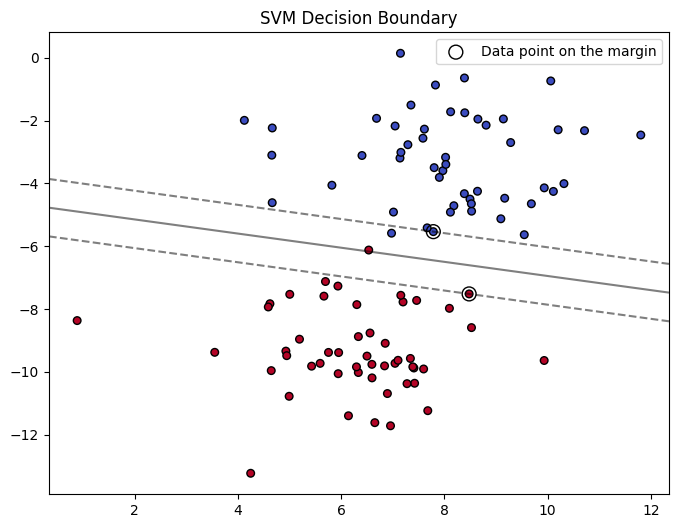

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split

# 1. 데이터 생성 (2개 클래스, 2차원 특징)
X, y = datasets.make_blobs(n_samples=100, centers=2, random_state=6, cluster_std=1.5)

# 2. 학습/테스트 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. SVM 모델 학습 (선형 커널)
model = svm.SVC(kernel='linear', C=1.0)
model.fit(X, y)

# 4. 시각화 함수
def plot_svm_decision_boundary(model, X, y):
    plt.figure(figsize=(8, 6))

    # 산점도
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=30, edgecolors='k')

    # 결정 경계 시각화
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # 격자 생성
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = model.decision_function(xy).reshape(XX.shape)

    # 결정 경계 및 마진 표시
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # Support Vector 표시
    ax.scatter(model.support_vectors_[np.abs(model.dual_coef_[0, :]) != 1, 0], model.support_vectors_[np.abs(model.dual_coef_[0, :]) != 1, 1],
               s=100, linewidth=1, facecolors='none', edgecolors='k', label='Data point on the margin')
    plt.legend()
    plt.title("SVM Decision Boundary")
    plt.show()

# 시각화 실행
plot_svm_decision_boundary(model, X, y)


In [6]:
model.support_vectors_

array([[ 6.97728359, -5.5831838 ],
       [ 5.69791405, -7.1216607 ],
       [ 8.47985475, -7.51658748]])

In [18]:
model.dual_coef_

array([[-0.28133511, -1.        ,  1.        ,  0.28133511]])

In [20]:
np.abs(model.dual_coef_) == 1

array([[False,  True,  True, False]])

In [25]:
model.support_vectors_[0][]

IndexError: too many indices for array

In [34]:
model.support_vectors_[np.abs(model.dual_coef_[0, :]) == 1]

array([[ 6.97728359, -5.5831838 ],
       [ 6.53572906, -6.11992696]])

In [31]:
np.abs(model.dual_coef_[0, :]) == 1

array([False,  True,  True, False])

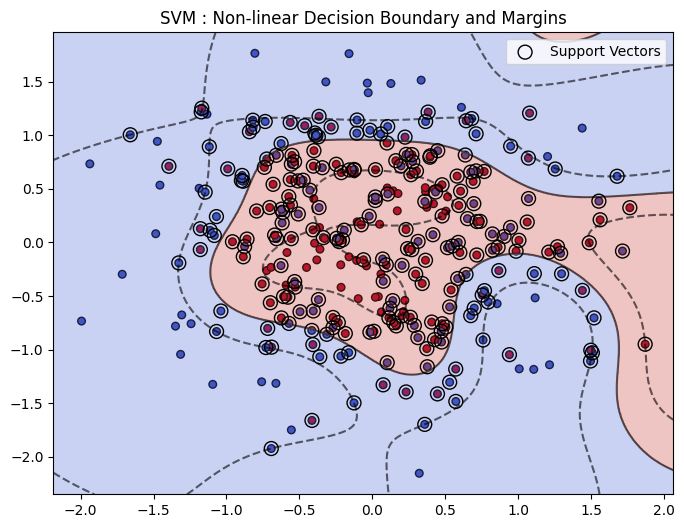

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split

# 1. 비선형 분류가 필요한 데이터 생성 (make_circles)
from sklearn.datasets import make_circles
X, y = make_circles(n_samples=300, factor=0.5, noise=0.5, random_state=42)

# 2. RBF 커널 SVM 모델 학습
clf = svm.SVC(kernel='rbf', C=10, gamma=1.0)
clf.fit(X, y)

# 3. 결정 경계 및 마진 시각화 함수
def plot_rbf_svm_decision_boundary(model, X, y):
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=30, edgecolors='k')

    # Create grid to evaluate model
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    xx = np.linspace(xlim[0], xlim[1], 500)
    yy = np.linspace(ylim[0], ylim[1], 500)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = model.decision_function(xy).reshape(XX.shape)
    
    # 결정 경계 및 마진 시각화
    plt.contourf(XX, YY, Z > 0, alpha=0.3, cmap=plt.cm.coolwarm)

    # 결정 경계 및 마진 시각화
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.6,
               linestyles=['--', '-', '--'])

    # Support Vector 표시
    ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
               s=100, linewidth=1, facecolors='none', edgecolors='k', label='Support Vectors')

    plt.title("SVM : Non-linear Decision Boundary and Margins")
    plt.legend()
    plt.show()

# 시각화 실행
plot_rbf_svm_decision_boundary(clf, X, y)

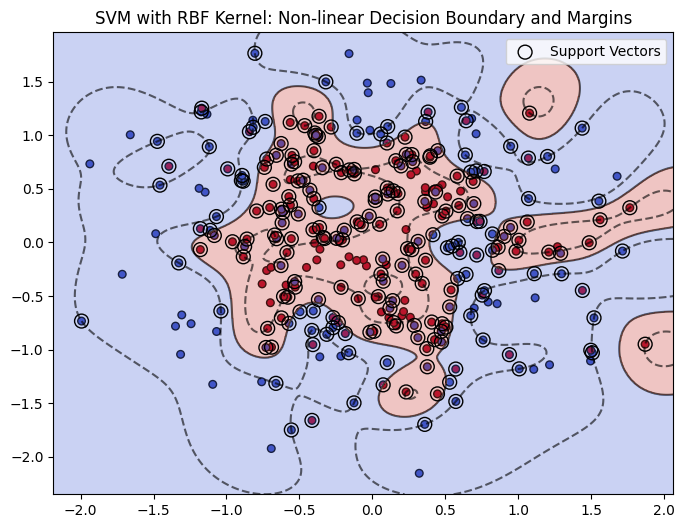

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split

# 1. 비선형 분류가 필요한 데이터 생성 (make_circles)
from sklearn.datasets import make_circles
X, y = make_circles(n_samples=300, factor=0.5, noise=0.5, random_state=42)

# 2. RBF 커널 SVM 모델 학습
clf = svm.SVC(kernel='rbf', C=10, gamma=3.0)
clf.fit(X, y)

# 3. 결정 경계 및 마진 시각화 함수
def plot_rbf_svm_decision_boundary(model, X, y):
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=30, edgecolors='k')

    # Create grid to evaluate model
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    xx = np.linspace(xlim[0], xlim[1], 500)
    yy = np.linspace(ylim[0], ylim[1], 500)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = model.decision_function(xy).reshape(XX.shape)
    
    plt.contourf(XX, YY, Z > 0, alpha=0.3, cmap=plt.cm.coolwarm)
    # 결정 경계 및 마진 시각화
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.6,
               linestyles=['--', '-', '--'])

    # Support Vector 표시
    ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
               s=100, linewidth=1, facecolors='none', edgecolors='k', label='Support Vectors')

    plt.title("SVM with RBF Kernel: Non-linear Decision Boundary and Margins")
    plt.legend()
    plt.show()

# 시각화 실행
plot_rbf_svm_decision_boundary(clf, X, y)

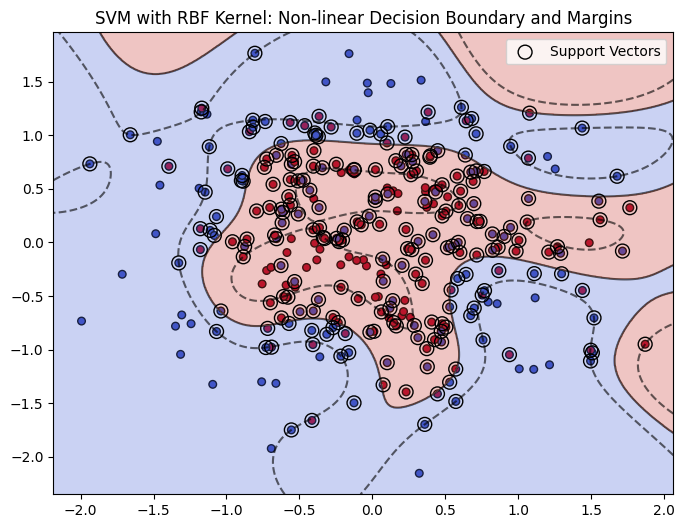

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split

# 1. 비선형 분류가 필요한 데이터 생성 (make_circles)
from sklearn.datasets import make_circles
X, y = make_circles(n_samples=300, factor=0.5, noise=0.5, random_state=42)

# 2. RBF 커널 SVM 모델 학습
clf = svm.SVC(kernel='rbf', C=100, gamma=1.0)
clf.fit(X, y)

# 3. 결정 경계 및 마진 시각화 함수
def plot_rbf_svm_decision_boundary(model, X, y):
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=30, edgecolors='k')

    # Create grid to evaluate model
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    xx = np.linspace(xlim[0], xlim[1], 500)
    yy = np.linspace(ylim[0], ylim[1], 500)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = model.decision_function(xy).reshape(XX.shape)
    
    plt.contourf(XX, YY, Z > 0, alpha=0.3, cmap=plt.cm.coolwarm)
    # 결정 경계 및 마진 시각화
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.6,
               linestyles=['--', '-', '--'])

    # Support Vector 표시
    ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
               s=100, linewidth=1, facecolors='none', edgecolors='k', label='Support Vectors')

    plt.title("SVM with RBF Kernel: Non-linear Decision Boundary and Margins")
    plt.legend()
    plt.show()

# 시각화 실행
plot_rbf_svm_decision_boundary(clf, X, y)

In [91]:
import pandas as pd
from scipy.stats import mannwhitneyu
df_gene = pd.read_csv('data/gene.csv').sort_values('cancer')
s_mw = df_gene.iloc[:, 1:-2].apply(
    lambda x: mannwhitneyu(x.loc[df_gene.iloc[:, -1]], x.loc[~df_gene.iloc[:, -1]])[-1]
)
s_mw.sort_values()[:50]

X87871_s_at           5.044065e-07
U81001_at             5.191632e-07
M31606_at             9.672339e-07
X58521_at             1.022383e-06
X87870_at             1.776096e-06
HG1322-HT5143_s_at    2.811600e-06
M26602_at             3.476716e-06
X60486_at             5.026228e-06
J03827_at             9.801282e-06
U15008_at             9.801282e-06
X67247_rna1_at        1.324637e-05
X99133_at             1.499605e-05
L37043_at             1.537411e-05
J04617_s_at           1.615284e-05
X79781_at             1.653922e-05
hum_alu_at            1.696894e-05
U85430_at             1.870663e-05
D37781_s_at           1.913719e-05
Z48501_s_at           1.918121e-05
X94232_at             2.063605e-05
HG4312-HT4582_s_at    2.219834e-05
M14218_at             2.505069e-05
M91585_at             2.505418e-05
X75042_at             2.690898e-05
X83973_at             2.759374e-05
X87159_at             3.035505e-05
X57346_at             3.340384e-05
D63998_at             3.419742e-05
Z12962_at           

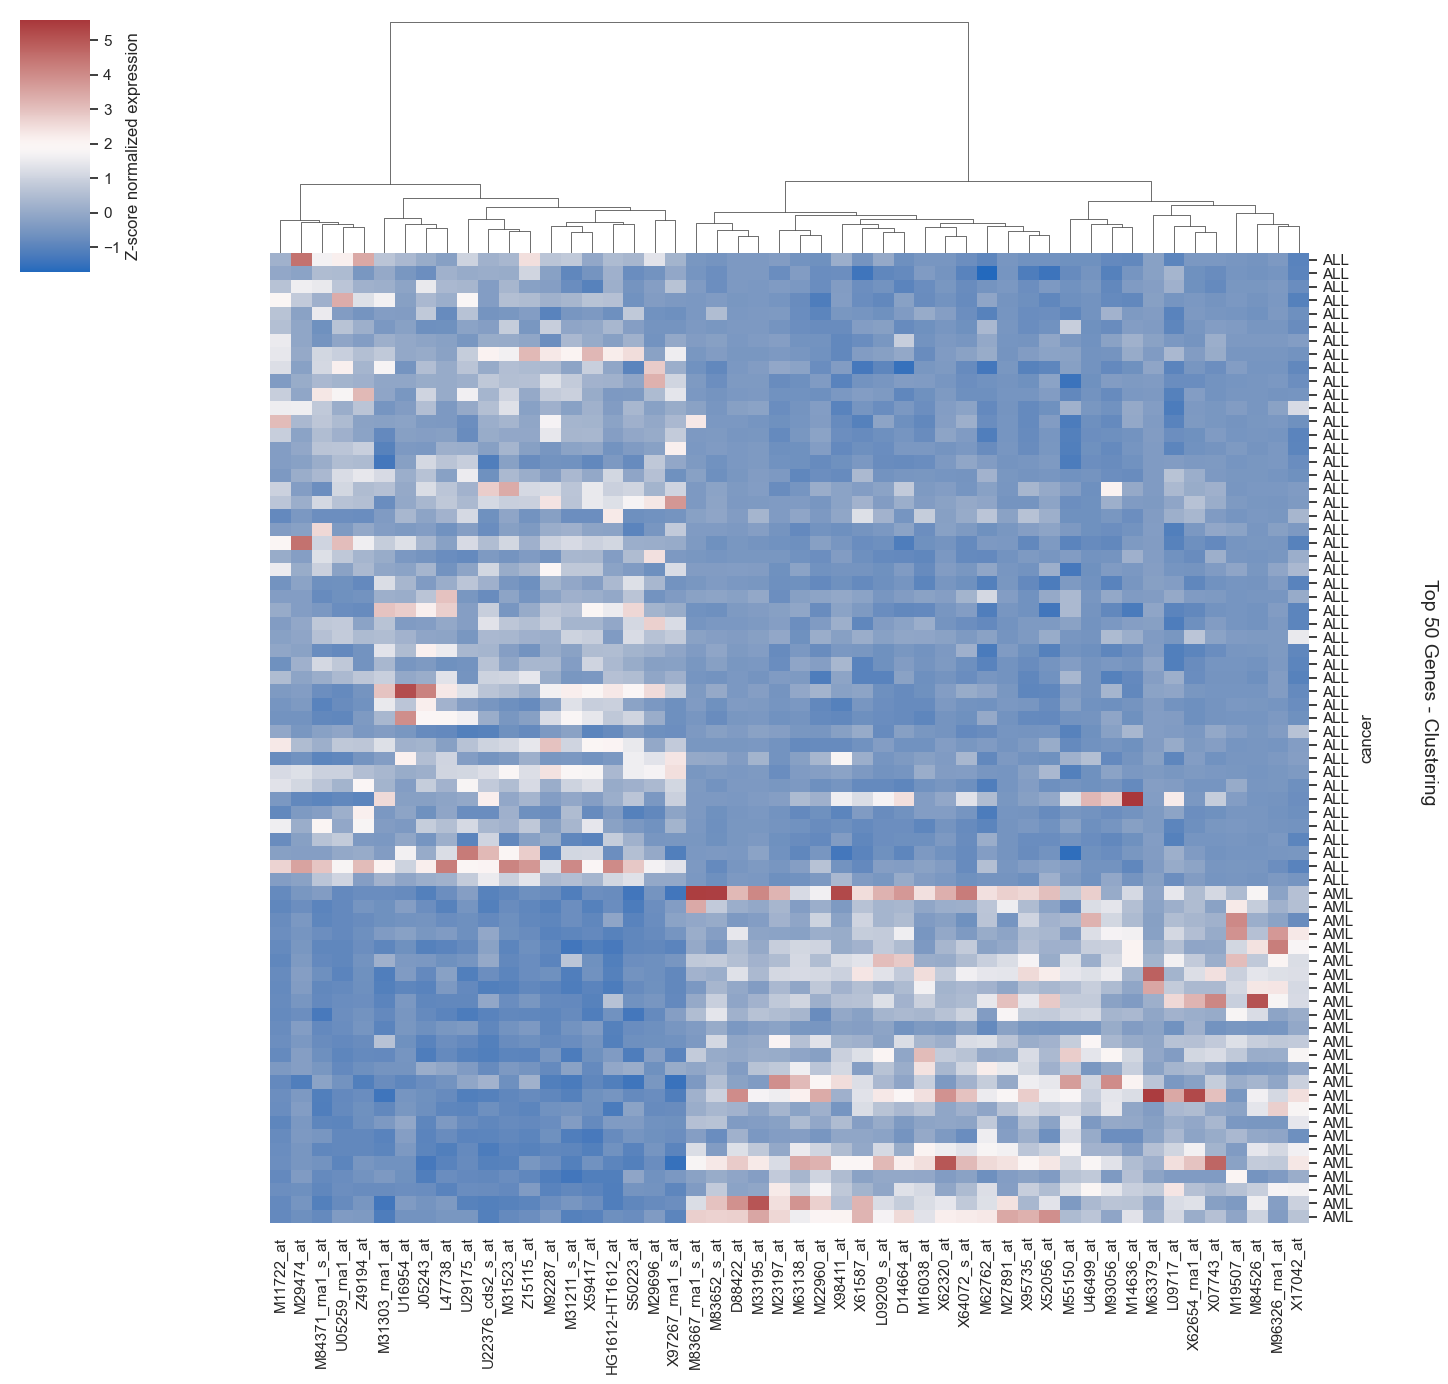

In [102]:
from sklearn.preprocessing import StandardScaler
top_n=50
# 2. 클래스 라벨 추출 (맨 마지막 열), 피처 데이터 추출
y = df_gene.iloc[:, -2]
X = df_gene.iloc[:, 1:-2]  # gene 이름 컬럼 제외, 마지막 두 컬럼 제외

# 3. Mann-Whitney U Test로 유의한 유전자 top_n 선택
p_values = X.apply(lambda x: mannwhitneyu(x[y == 'ALL'], x[y == 'AML']).pvalue)
top_genes = p_values.sort_values().index[:top_n]

# 4. 상위 유전자 발현 데이터만 추출 및 정규화
X_top = X[top_genes]
X_scaled = pd.DataFrame(StandardScaler().fit_transform(X_top), columns=top_genes)

from scipy.cluster.hierarchy import linkage
# 5. 계층적 클러스터링 + 히트맵
sns.set(style="white")

# 5. linkage 계산 (열 기준 → 유전자 단위 군집화)
gene_linkage = linkage(X_scaled.T, method='ward')

# 6. 히트맵 출력 (col_cluster=True, row_cluster=False)
sns.set(style="white")

g = sns.clustermap(
    X_scaled.set_index(df_gene['cancer']),
    col_linkage=gene_linkage,
    row_cluster=False,
    cmap='vlag',
    figsize=(14, 14),
    xticklabels=True,
    yticklabels=True,
    cbar_kws={'label': 'Z-score normalized expression'}
)

plt.title("")  # 제거하거나 생략

# 오른쪽에 90도 회전된 타이틀 추가
g.fig.text(
    1.02,                 # x 위치 (오른쪽 여백)
    0.5,                  # y 위치 (세로 중앙)
    "Top 50 Genes - Clustering",  # 텍스트 내용
    va='center',
    ha='left',
    fontsize=14,
    rotation=270         # 270도 = 왼쪽에서 아래로 쓰는 방향
)
plt.show()

In [97]:
X_scaled.set_index(df_gene['cancer'])

,M23197_at,X95735_at,M27891_at,M31523_at,U46499_at,L09209_s_at,D88422_at,J05243_at,M92287_at,M63138_at,...,M14636_at,M31303_rna1_at,Z49194_at,S50223_at,D14664_at,X98411_at,X64072_s_at,M62762_at,L09717_at,M84371_rna1_s_at
cancer,,,,,,,,,,,,,,,,,,,,,
ALL,-0.343639,-0.624947,-0.494985,0.348838,-0.639986,-0.002881,-0.422796,0.050004,0.657214,-0.602017,...,-0.870314,0.676442,3.464559,0.326919,-0.672231,0.126691,-0.698251,-0.946273,-0.968242,1.689926
ALL,-0.733295,-1.182352,-0.539593,0.061228,-0.552594,-0.904106,-0.433994,-0.719982,-0.211740,-0.336995,...,-0.541484,0.002382,-0.466689,-0.724118,-0.810868,-0.696813,-1.010238,-1.722692,0.291867,0.475389
ALL,-0.363452,-0.702937,-0.453527,0.321727,-0.486427,-0.604391,-0.419063,1.488209,-0.276605,-0.452318,...,-0.366794,0.149207,0.214047,-0.571548,-0.988322,-0.339369,-0.779099,-0.568183,0.168699,1.488035
ALL,-0.548374,-0.693762,-0.556011,0.542149,-0.581309,-0.888842,-0.468988,0.387954,0.204346,-0.771674,...,-0.890866,1.664172,1.278911,-0.626643,-0.228596,-0.309747,-0.795468,-0.115579,-0.541889,0.166177
ALL,-0.381064,-0.735625,-0.533955,-0.492774,-0.607526,-0.643937,-0.458723,0.787348,-1.026112,-0.750606,...,-0.407897,-0.300611,-0.561505,0.771914,-0.378323,-0.477607,-0.699243,-1.063104,-1.015614,1.527350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AML,1.217185,1.992909,2.417008,-1.058563,1.859407,3.139957,2.819075,-1.297953,-0.714839,3.444639,...,0.486109,-0.620289,-0.510450,-1.118257,2.183674,1.929710,3.115033,2.560491,2.461529,-0.592510
AML,0.801112,-0.193703,-0.299636,-0.748558,0.784493,-0.031326,-0.099915,-1.152020,-1.167312,0.321676,...,0.578592,-0.413399,-0.600405,-0.096887,-0.017869,0.460437,-0.189846,-0.679494,-0.361873,-0.820966
AML,2.273878,0.894155,-0.290349,-0.854643,1.975513,-0.066709,-0.158239,-0.725743,-1.035604,0.941907,...,0.922836,-0.779126,-0.763295,-0.571548,1.318584,0.746787,0.447520,1.262473,2.347835,-0.904911


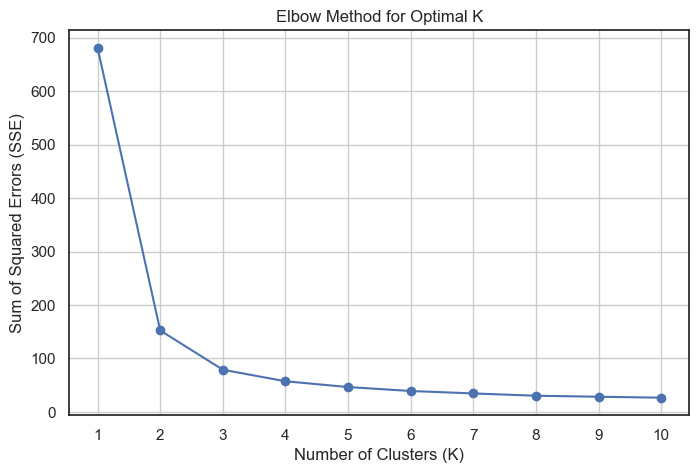

In [105]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import numpy as np

# 1. 데이터 로딩
iris = load_iris()
X = iris.data

# 2. K 값 범위 지정
K_range = range(1, 11)  # K=1~10
sse = []

# 3. 각 K에 대해 KMeans 학습 및 SSE 계산
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)  # inertia_ = SSE (within-cluster sum of squares)

# 4. Elbow 그래프 시각화
plt.figure(figsize=(8, 5))
plt.plot(K_range, sse, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method for Optimal K')
plt.xticks(K_range)
plt.grid(True)
plt.show()

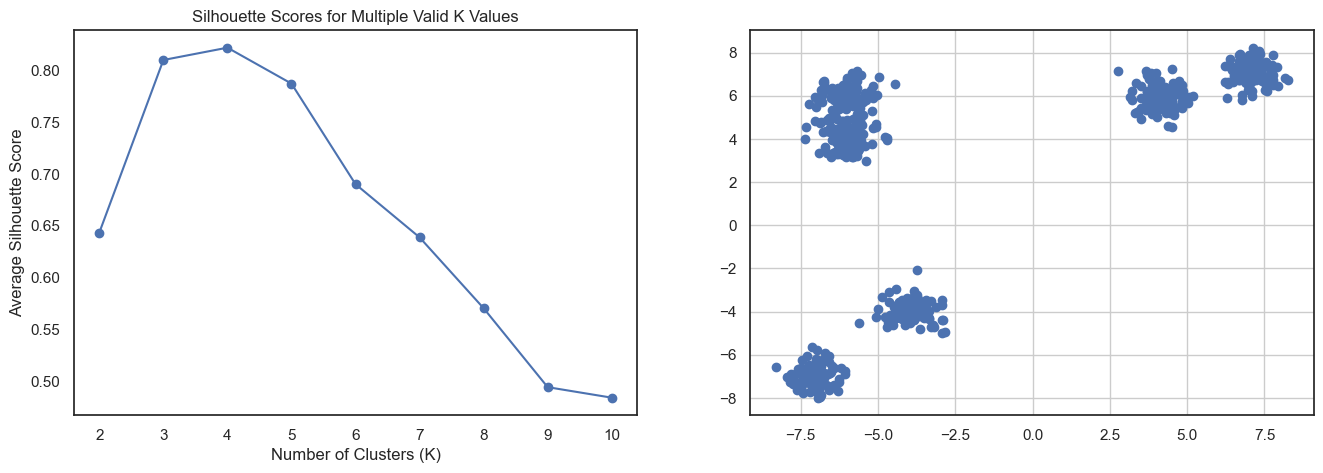

In [123]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# 1. 데이터 생성: 2개의 큰 그룹 + 각 그룹 내 2~3개 소군집
centers = [[-7, -7], [-4, -4], [-6, 6], [-6, 4], [7, 7], [4, 6]]
X, _ = make_blobs(n_samples=600, centers=centers, cluster_std=0.5, random_state=42)

# 2. 다양한 K에 대해 실루엣 점수 계산
K_range = range(2, 11)
silhouette_scores = []

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)

# 3. 시각화
_, ax = plt.subplots(1, 2, figsize=(16, 5))
ax[0].plot(K_range, silhouette_scores, marker='o')
ax[0].set_xlabel("Number of Clusters (K)")
ax[0].set_ylabel("Average Silhouette Score")
ax[0].set_title("Silhouette Scores for Multiple Valid K Values")
ax[1].scatter(x=X[:, 0], y = X[:, 1])
plt.grid(True)
plt.show()

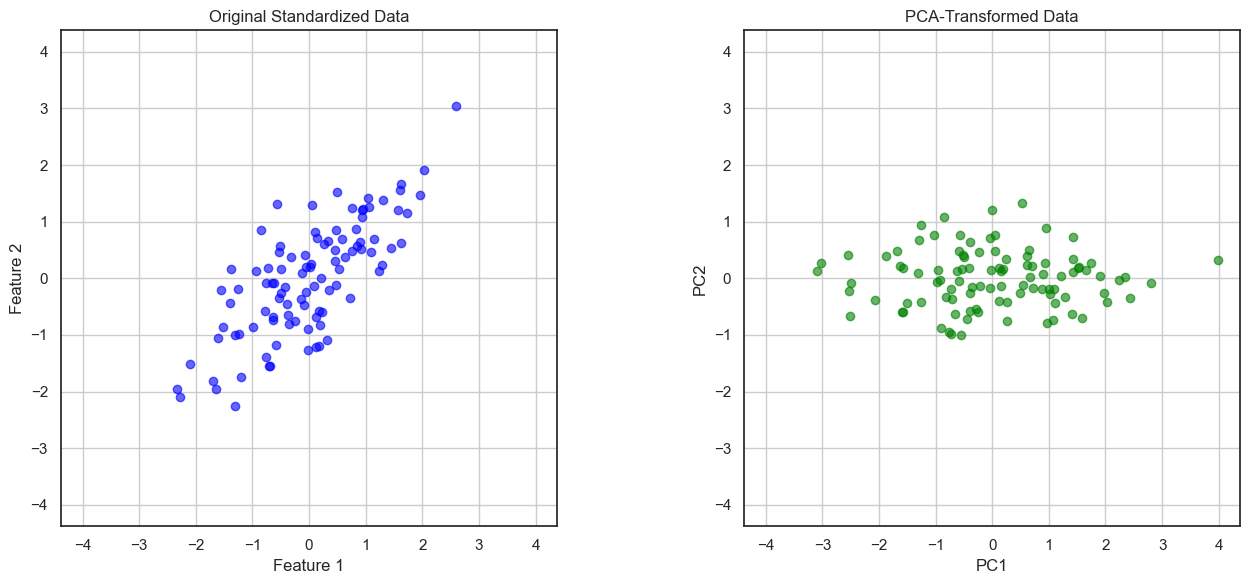

In [126]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 1. 2차원 데이터 생성 (상관 있는 분포)
np.random.seed(42)
n_samples = 100
mean = [0, 0]
cov = [[3, 2], [2, 2]]
X = np.random.multivariate_normal(mean, cov, n_samples)

# 2. 표준화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. PCA 변환 (2개 성분)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 4. 동일한 축 범위를 위한 공통 limit 계산
xy_lim = max(np.abs(X_scaled).max(), np.abs(X_pca).max()) * 1.1

# 5. 시각화
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# 원본 데이터
axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], color='blue', alpha=0.6)
axes[0].set_title("Original Standardized Data")
axes[0].set_xlabel("Feature 1")
axes[0].set_ylabel("Feature 2")
axes[0].set_xlim(-xy_lim, xy_lim)
axes[0].set_ylim(-xy_lim, xy_lim)
axes[0].set_aspect('equal')
axes[0].grid(True)

# PCA 변환 데이터
axes[1].scatter(X_pca[:, 0], X_pca[:, 1], color='green', alpha=0.6)
axes[1].set_title("PCA-Transformed Data")
axes[1].set_xlabel("PC1")
axes[1].set_ylabel("PC2")
axes[1].set_xlim(-xy_lim, xy_lim)
axes[1].set_ylim(-xy_lim, xy_lim)
axes[1].set_aspect('equal')
axes[1].grid(True)

plt.tight_layout()
plt.show()


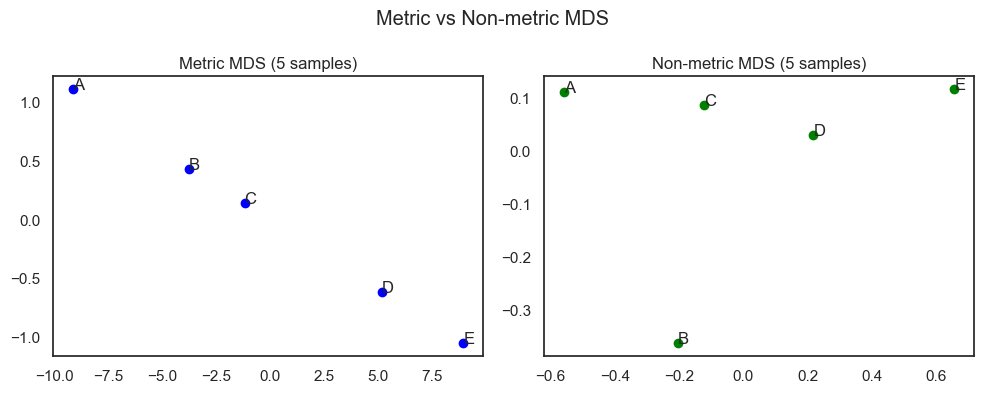

In [157]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import MDS

# 1. 라벨 및 축소된 거리 행렬 정의 (5개 샘플: A~E)
labels = list("ABCDE")
distance_matrix = np.array([
    [0,  1,  2,  16,  27],
    [1,  0,  1,  9,  10],
    [2,  1,  0,  2,  7],
    [16,  9,  2,  0,  1],
    [27,  10,  7,  1,  0]
])

# 2. Metric MDS
mds_metric = MDS(n_components=2, dissimilarity="precomputed", metric=True, random_state=0)
pos_metric = mds_metric.fit_transform(distance_matrix)

# 3. Non-metric MDS
mds_nonmetric = MDS(n_components=2, dissimilarity="precomputed", metric=False, random_state=0)
pos_nonmetric = mds_nonmetric.fit_transform(distance_matrix)

# 4. 시각화
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
axes[0].scatter(pos_metric[:, 0], pos_metric[:, 1], c='blue')
axes[1].scatter(pos_nonmetric[:, 0], pos_nonmetric[:, 1], c='green')

for i, label in enumerate(labels):
    axes[0].text(pos_metric[i, 0], pos_metric[i, 1], label, fontsize=12)
    axes[1].text(pos_nonmetric[i, 0], pos_nonmetric[i, 1], label, fontsize=12)

axes[0].set_title("Metric MDS (5 samples)")
axes[1].set_title("Non-metric MDS (5 samples)")
plt.suptitle("Metric vs Non-metric MDS")
plt.tight_layout()
plt.show()


In [134]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

# 1. Iris 데이터셋 로드
iris = load_iris()
X = iris.data  # 입력 변수만 사용
feature_names = iris.feature_names

# 2. 평균 중심화 (centering)
X_centered = X - np.mean(X, axis=0)

# 3. 공분산 행렬 계산
cov_matrix = np.cov(X_centered, rowvar=False)

# 4. 고유값 분해
eig_vals, eig_vecs = np.linalg.eigh(cov_matrix)  # symmetric matrix이므로 eigh 사용

# 5. 고유값 내림차순 정렬 (주성분 순서대로)
sorted_idx = np.argsort(eig_vals)[::-1]
eig_vals_sorted = eig_vals[sorted_idx]
eig_vecs_sorted = eig_vecs[:, sorted_idx]

# 6. 고유벡터 행렬 (열벡터 = 주성분 방향, 행 = 변수)
pca_components_df = pd.DataFrame(
    eig_vecs_sorted,
    index=feature_names,
    columns=[f'{i+1} 주성분' for i in range(eig_vecs_sorted.shape[1])]
)

# 7. 출력
print("고유벡터 행렬 (주성분 방향):")
pca_components_df.round(4)

고유벡터 행렬 (주성분 방향):


,1 주성분,2 주성분,3 주성분,4 주성분
sepal length (cm),-0.3614,0.6566,0.5820,0.3155
sepal width (cm),0.0845,0.7302,-0.5979,-0.3197
petal length (cm),-0.8567,-0.1734,-0.0762,-0.4798
petal width (cm),-0.3583,-0.0755,-0.5458,0.7537


In [133]:
pd.Series(
    eig_vals_sorted, index=[f'{i+1}주성분' for i in range(eig_vecs_sorted.shape[1])], name = '고유값'
).pipe(
    lambda x: pd.DataFrame([x, (x / x.sum()).rename('고유값 비율')])
)

,1주성분,2주성분,3주성분,4주성분
고유값,4.228242,0.242671,0.078210,0.023835
고유값 비율,0.924619,0.053066,0.017103,0.005212


In [140]:
import pandas as pd
import numpy as np

# 1. UCI에서 Abalone 데이터 불러오기
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data"
column_names = [
    "Sex", "Length", "Diameter", "Height",
    "WholeWeight", "ShuckedWeight", "VisceraWeight",
    "ShellWeight", "Rings"
]
abalone_df = pd.read_csv(url, header=None, names=column_names)

# 2. 분석에 사용할 변수 선택
features = ["WholeWeight", "ShuckedWeight", "VisceraWeight", "ShellWeight"]
X = abalone_df[features].values

# 3. 평균 중심화
X_centered = X - np.mean(X, axis=0)

# 4. 공분산 행렬
cov_matrix = np.cov(X_centered, rowvar=False)

# 5. 고유값 분해
eig_vals, eig_vecs = np.linalg.eigh(cov_matrix)

# 6. 고유값 내림차순 정렬
sorted_idx = np.argsort(eig_vals)[::-1]
eig_vals_sorted = eig_vals[sorted_idx]
eig_vecs_sorted = eig_vecs[:, sorted_idx]

# 7. 고유벡터 행렬 만들기 (행 = 변수, 열 = PC)
pca_components_df = pd.DataFrame(
    eig_vecs_sorted,
    index=features,
    columns=[f"{i+1}주성분" for i in range(eig_vecs_sorted.shape[1])]
)

# 8. 결과 출력
print("PCA 고유벡터 행렬 (주성분 방향):")
pca_components_df.round(5)

PCA 고유벡터 행렬 (주성분 방향):


,1주성분,2주성분,3주성분,4주성분
WholeWeight,-0.87202,0.17128,-0.13484,-0.43824
ShuckedWeight,-0.38517,-0.77448,0.35525,0.35442
VisceraWeight,-0.18852,0.02872,-0.76074,0.62041
ShellWeight,-0.23597,0.60829,0.52620,0.54536


In [142]:
pd.Series(
    eig_vals_sorted, index=[f'{i+1}주성분' for i in range(eig_vecs_sorted.shape[1])], name = '고유값'
).pipe(
    lambda x: pd.DataFrame([x, (x / x.sum()).rename('고유값 비율')])
).round(4)

,1주성분,2주성분,3주성분,4주성분
고유값,0.3160,0.0037,0.0011,0.0004
고유값 비율,0.9839,0.0114,0.0033,0.0014


In [144]:
eig_vals_sorted.round(4).sum()

0.3212

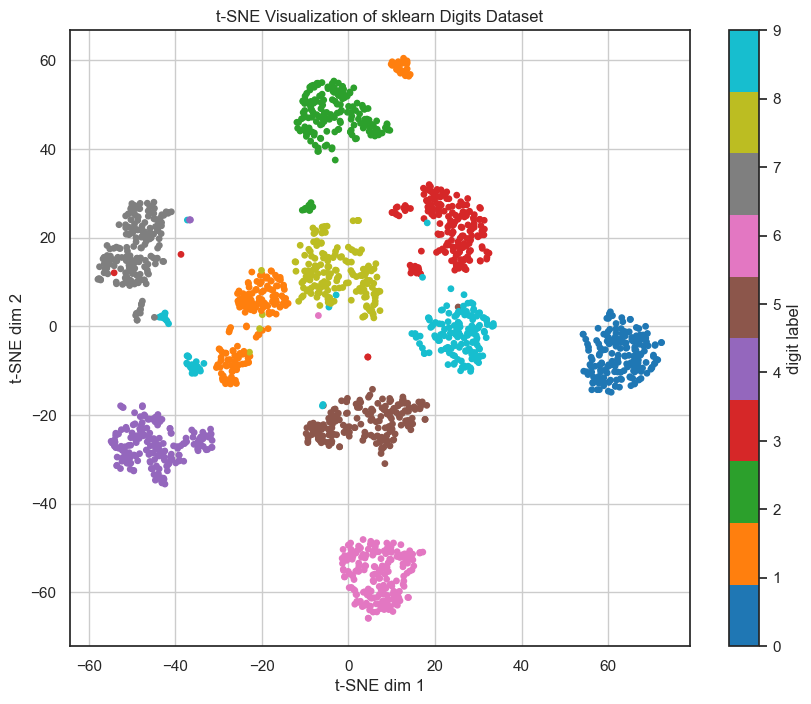

In [159]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.manifold import TSNE

# 1. digits 데이터셋 로드
digits = datasets.load_digits()
X = digits.data      # (1797, 64) = 8x8 이미지 벡터
y = digits.target    # 라벨 (0~9)

# 2. t-SNE 적용 (2차원으로 시각화)
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X)

# 3. 시각화
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='tab10', s=15)
plt.colorbar(scatter, ticks=range(10), label="digit label")
plt.title("t-SNE Visualization of sklearn Digits Dataset")
plt.xlabel("t-SNE dim 1")
plt.ylabel("t-SNE dim 2")
plt.grid(True)
plt.show()


c:\users\user\python3.7\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


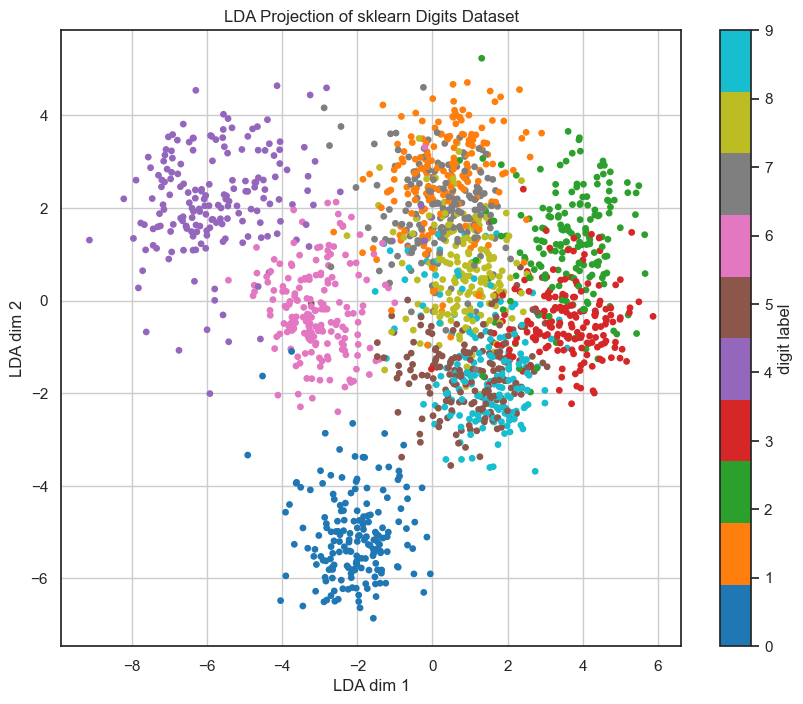

In [160]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# 1. digits 데이터 로드
digits = datasets.load_digits()
X = digits.data      # (1797, 64)
y = digits.target    # (1797, )

# 2. LDA 적용 (2D로 차원 축소)
lda = LDA(n_components=2)
X_lda = lda.fit_transform(X, y)

# 3. 시각화
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_lda[:, 0], X_lda[:, 1], c=y, cmap='tab10', s=15)
plt.colorbar(scatter, ticks=range(10), label="digit label")
plt.title("LDA Projection of sklearn Digits Dataset")
plt.xlabel("LDA dim 1")
plt.ylabel("LDA dim 2")
plt.grid(True)
plt.show()


In [162]:
lda.explained_variance_ratio_.sum()

0.4717482935955849

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from imblearn.over_sampling import RandomOverSampler
from tqdm import tqdm

# 1. 데이터 로딩
data = fetch_openml(name='creditcard', version=1, as_frame=True)
df = data.frame

# 2. 데이터 전처리
X = df.drop(columns=['Class'])
y = df['Class']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. 학습/테스트 분리
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)

# 4. Oversampling 비율 설정
ratios = np.linspace(0.1, 1.0, 10)
f1_scores = []

# 5. 모델 학습 및 평가
for ratio in tqdm(ratios):
    ros = RandomOverSampler(sampling_strategy=ratio, random_state=42)
    X_resampled, y_resampled = ros.fit_resample(X_train, y_train)
    
    model = RandomForestClassifier(random_state=42, n_jobs=-1)
    model.fit(X_resampled, y_resampled)
    
    y_pred = model.predict(X_test)
    f1 = f1_score(y_test, y_pred)
    f1_scores.append(f1)

# 6. 결과 시각화
plt.figure(figsize=(10, 6))
plt.plot(ratios, f1_scores, marker='o')
plt.title('F1 Score vs Random Over Sampling Ratio')
plt.xlabel('Over Sampling Ratio')
plt.ylabel('F1 Score')
plt.grid(True)
plt.xticks(ratios.round(2))
plt.show() 

C:\Users\USER\python312\Lib\site-packages\sklearn\datasets\_openml.py:107: UserWarning: A network error occurred while downloading https://api.openml.org/api/v1/json/data/list/data_name/creditcard/limit/2/data_version/1. Retrying...
  warn(


URLError: <urlopen error [WinError 10060] 연결된 구성원으로부터 응답이 없어 연결하지 못했거나, 호스트로부터 응답이 없어 연결이 끊어졌습니다>